In [46]:
#Installing the necessary packages

%pip install pandas
%pip install numpy
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [47]:
#Importing the necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
#Loading the dataset

df = pd.read_csv('diabetes.csv')

In [49]:
#Checking head()

df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1


In [50]:
#Checking tail()

df.tail(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1
767,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0,0


In [51]:
#Checking all the columns

df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [52]:
#Checking the datatype of each column

df.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

In [53]:
#Checking for null values

df.isna().sum()

Pregnancies                 1
Glucose                     3
BloodPressure               3
SkinThickness               2
Insulin                     3
BMI                         2
DiabetesPedigreeFunction    2
Age                         1
Outcome                     0
dtype: int64

In [54]:
#Replacing the null values with mean of the values in that column

for col in df.columns:
    for i in df[df[col].isna()].index:
        df[col][i] = df[col].mean()

/tmp/ipykernel_808/4276759886.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][i] = df[col].mean()
/tmp/ipykernel_808/4276759886.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

In [55]:
#Checking if all the null values are replaced

df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Question 1: What is the proportion of Healthy and Diabetic people in the sample data?

In [56]:
#Splitting 'Outcome' into two datasets: healthy(0) and diabetic(1)

healthy = df[df['Outcome'] == 0]
diabetic = df[df['Outcome'] != 0]

In [57]:
#Calculating percentage of healthy and diabetic people

hp = len(healthy)/len(df['Outcome']) * 100
dp = len(diabetic)/len(df['Outcome']) * 100

print(f'Percentage of Healthy people in sample data: {round(hp, 2)}%')
print(f'Percentage of Diabetic people in sample data: {round(dp, 2)}%')

Percentage of Healthy people in sample data: 65.1%
Percentage of Diabetic people in sample data: 34.9%


Text(0.5, 1.0, 'Amount of People who are Healthy vs Diabetic')

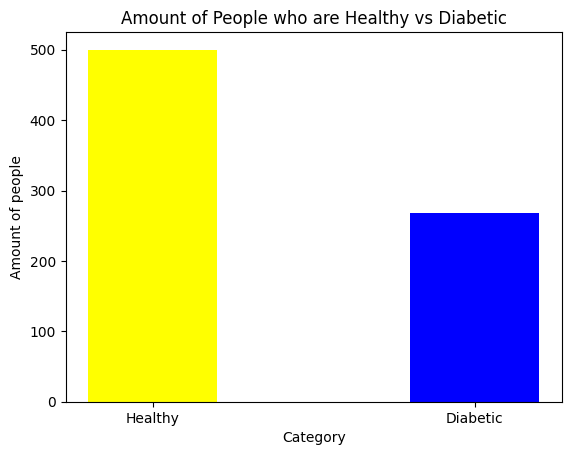

In [58]:
#Plotting Healthy and Diabetic population in the sample

plt.bar(['Healthy', 'Diabetic'], [len(healthy), len(diabetic)], color =['yellow', 'blue'], width = 0.4)
plt.xlabel('Category')
plt.ylabel('Amount of people')
plt.title('Amount of People who are Healthy vs Diabetic')

### Question 2: What is the distribution of the potential influencers to diabetes?

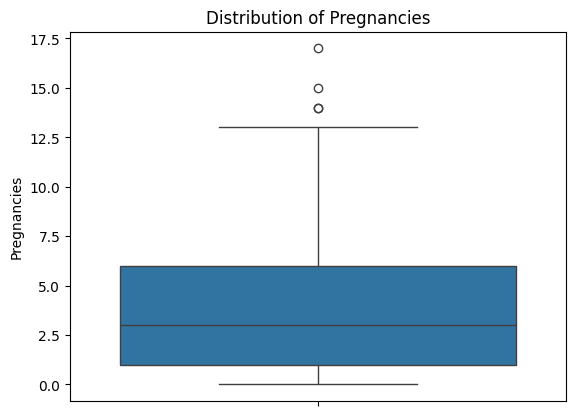

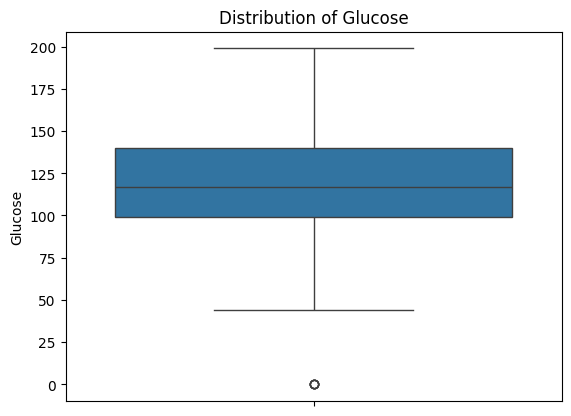

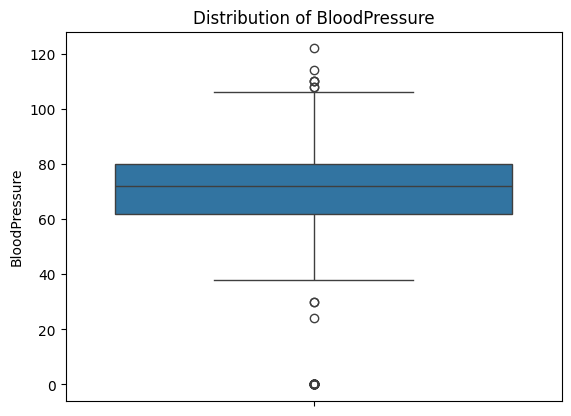

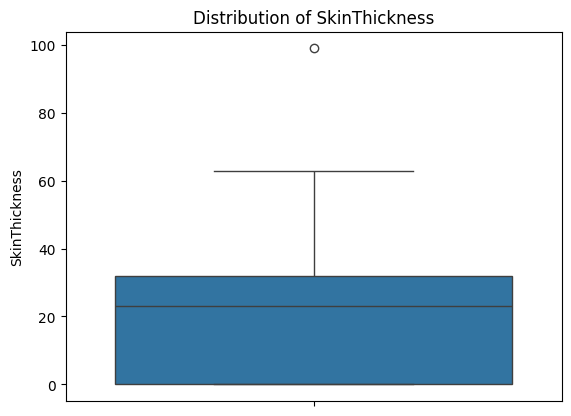

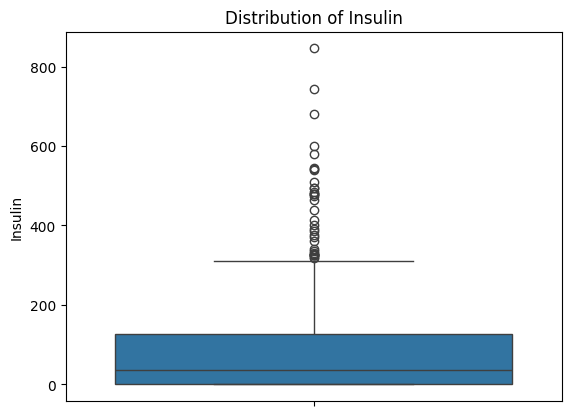

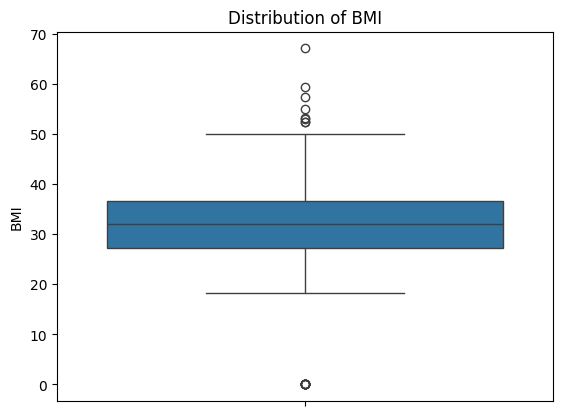

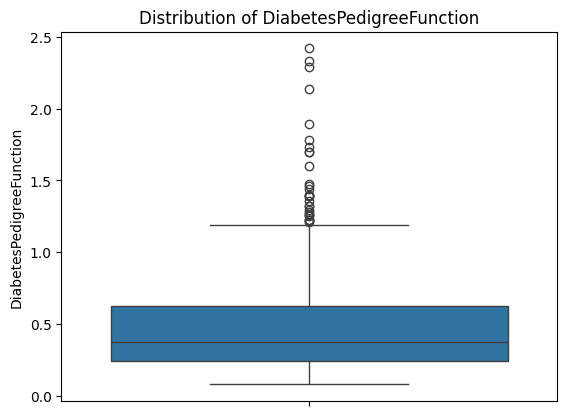

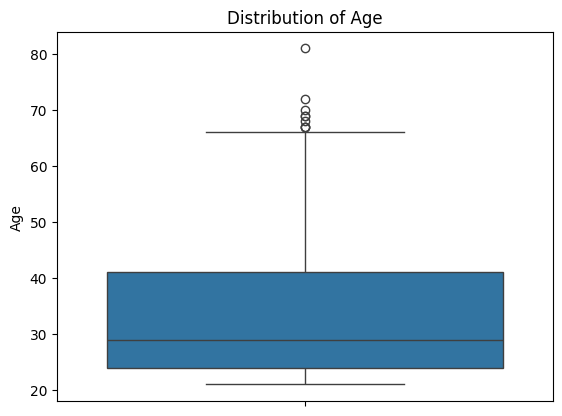

In [59]:
#Plotting distribution of the potential influencers: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction and Age

for col in df.columns:
    if col != 'Outcome':
        plt.title(f'Distribution of {col}')
        plt.show(sns.boxplot(df[col]))

### Question 3: Do the potential influencers vary in distribution across healthy and diabetic population? 

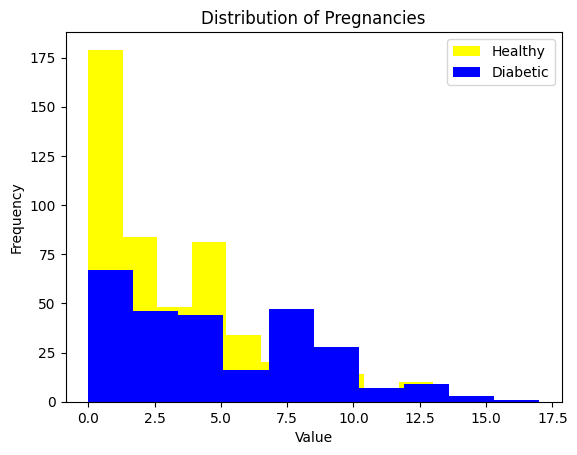

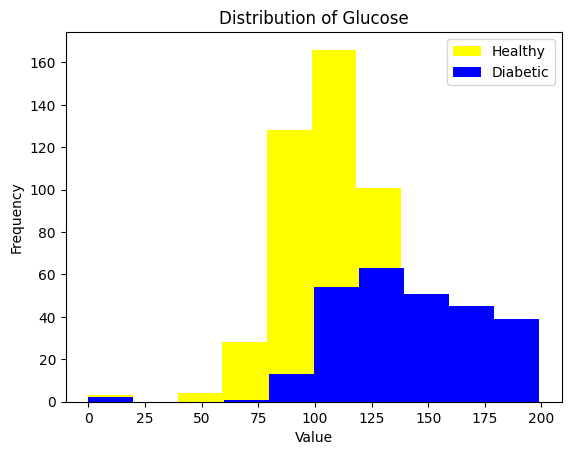

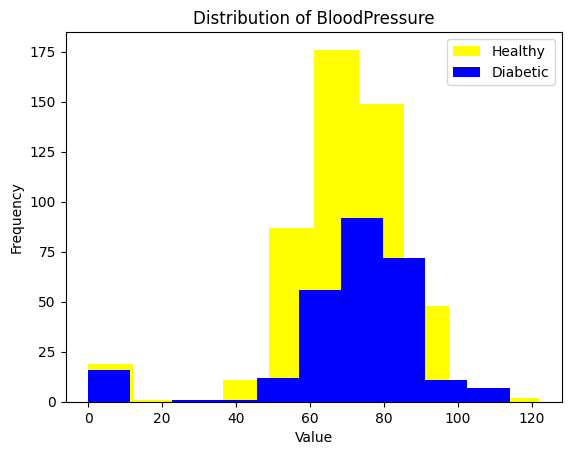

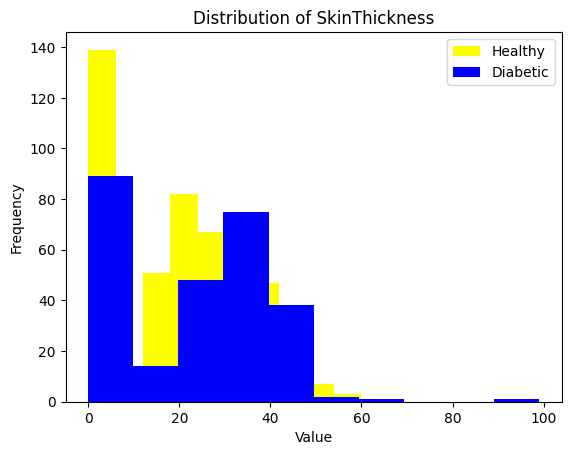

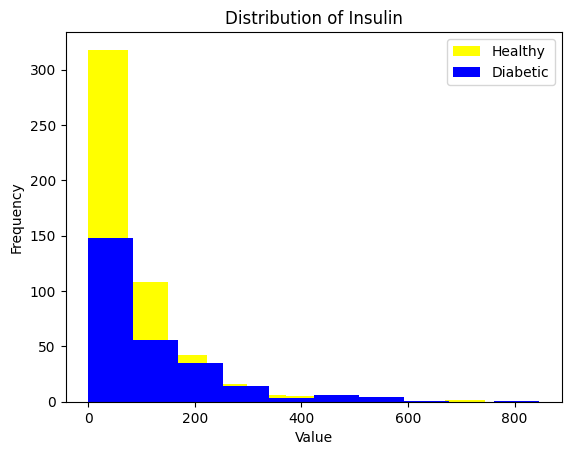

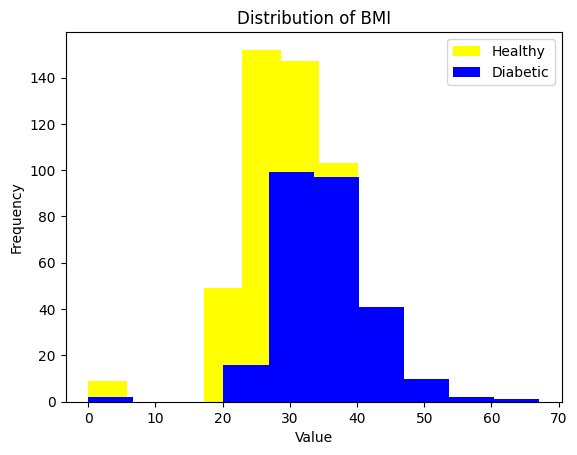

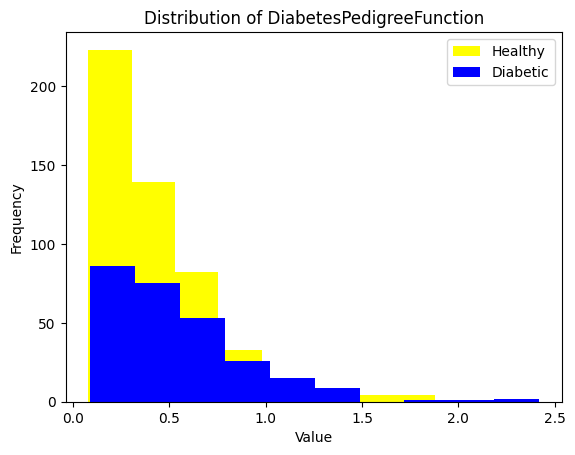

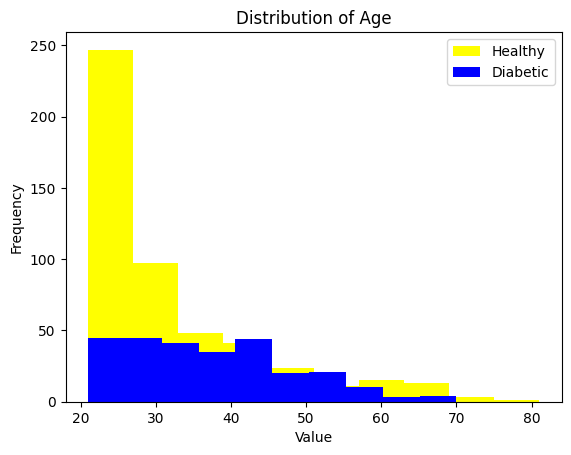

In [60]:
#Plotting distribution across healthy and diabetic population
#Ref: https://www.kaggle.com/code/vincentlugat/pima-indians-diabetes-eda-prediction-0-906

for col in df.columns:
    if col != 'Outcome':
        plt.hist(healthy[col], color = 'yellow', label = 'Healthy')
        plt.hist(diabetic[col], color = 'blue', label = 'Diabetic')
        plt.title(f'Distribution of {col}')
        plt.legend(loc='upper right')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

In [61]:
#Calculating mean values of potential influencers for healthy and diabetic population

mean_values = df[df.columns].corr()
for col in df.columns:
    mean_values.drop(col, axis = 1, inplace = True)
mean_values = mean_values.drop('Outcome')

mean_values['Healthy'] =  [healthy['Pregnancies'].mean(), healthy['Glucose'].mean(), healthy['BloodPressure'].mean(), healthy['SkinThickness'].mean(), healthy['Insulin'].mean(), healthy['BMI'].mean(), healthy['DiabetesPedigreeFunction'].mean(), healthy['Age'].mean()]

mean_values['Diabetic'] =  [diabetic['Pregnancies'].mean(), diabetic['Glucose'].mean(), diabetic['BloodPressure'].mean(), diabetic['SkinThickness'].mean(), diabetic['Insulin'].mean(), diabetic['BMI'].mean(), diabetic['DiabetesPedigreeFunction'].mean(), diabetic['Age'].mean()]

print(mean_values)

                             Healthy    Diabetic
Pregnancies                 3.299692    4.865672
Glucose                   110.013498  141.257463
BloodPressure              68.156303   70.791328
SkinThickness              19.612010   22.164179
Insulin                    68.951684  100.159267
BMI                        30.274894   35.142537
DiabetesPedigreeFunction    0.430073    0.550994
Age                        31.202498   37.067164


### Question 4: Are there significant correlations between the influencers and diabetes outcome?

<Axes: >

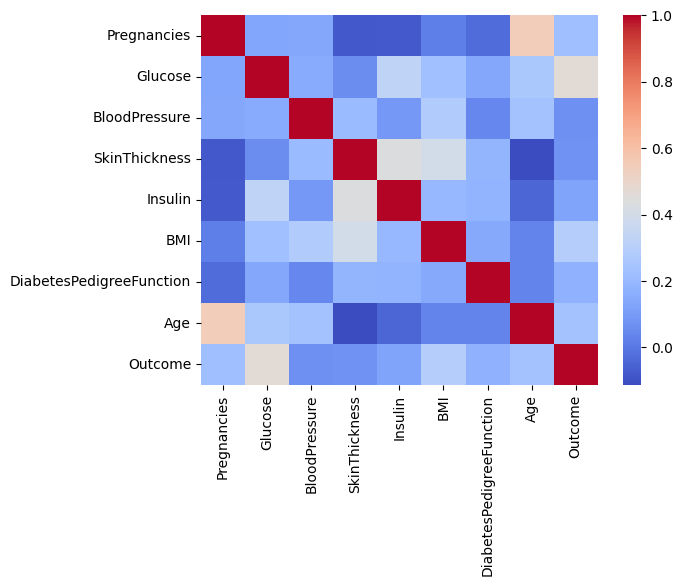

In [62]:
#Drawing correlation plot

ds = df[df.columns].corr()
sns.heatmap(ds, cmap = 'coolwarm')

In [63]:
#Ranking the potential influencers by ascending order of their correlation coefficients 

ds.sort_values('Outcome')['Outcome']

BloodPressure               0.064983
SkinThickness               0.076389
Insulin                     0.129340
DiabetesPedigreeFunction    0.174115
Pregnancies                 0.221668
Age                         0.237893
BMI                         0.295022
Glucose                     0.466348
Outcome                     1.000000
Name: Outcome, dtype: float64

### Inference from the above Analysis:

1. Diabetes represents 34.9% of the sample population.
2. Higher count of previous pregnancies have significant influence on diabetic outcome.
3. Higher glucose levels show higher incidence of diabetes.
4. No significant difference in distribution of BloodPressure, SkinThickness and DiabetesPedigreeFunction between healthy and diabetic population was seen in this sample.
5. Glucose, BMI, Age, Insulin and Pregnancies show higher correlation to diabetic outcome and have higher mean values in diabetic population in the sample.